In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Density based clustering

In this assignment we will implement the DBSCAN algortuhm and compare it with the official Python implementation on HDBSCAN. We'll test our algorithms with the synthetic data from the HDBSCAN python implementation. This data set has 6 natural non-isotropic clusters of different densities, plus noise.

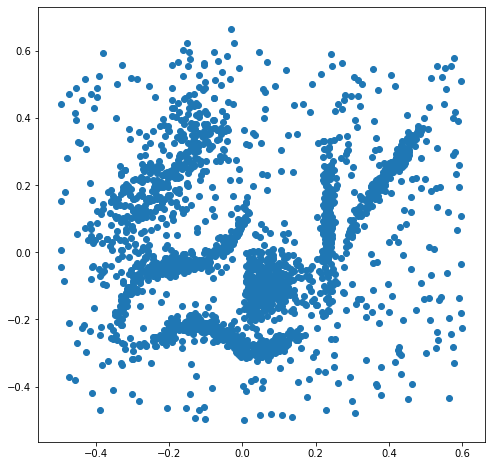

In [2]:
X = np.load('clusterable_data.npy')
figure = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1]);

## DBSCAN, neighborhood function (4 points) 

In [3]:
# To find wether a point is a core point or not, we need to find its neighborhood.
# Implement such function below.
def eps_neighborhood(i, X, e):
    """ Returns indices of all points whose distance to X[i] is less than e."""
    
    ### BEGIN SOLUTION
    dist = np.linalg.norm(X - X[i], axis=1)
    n_list = np.asarray(dist <= e)
    n_list[i] = False
    n_list = n_list.nonzero()
    ### END SOLUTION
    
    return n_list[0]

Compare the results with the plots in the lecture notes.

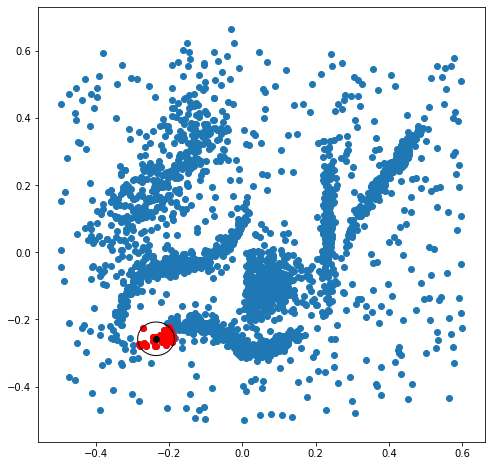

In [4]:
x_idx = 100
e=0.05
nn = eps_neighborhood(x_idx, X, e)
figure = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[nn][:,0], X[nn][:,1], c='r')
plt.scatter(X[x_idx][0], X[x_idx][1], c='k')
circle = plt.Circle((X[x_idx][0], X[x_idx][1]),radius=e, fill=False)
ax=plt.gca()
ax.add_patch(circle)
### BEGIN HIDDEN TESTS
x_idx = 100
e=0.05
nn = eps_neighborhood(x_idx, X, e)
assert len(nn)==37
### END HIDDEN TESTS

## DBSCAN, grow cluster function (4 points) 

In [5]:
# We now need a function to grow a cluster.
# Implement a function that starts at a core point and finds all density reachable points from it, 
# and adds them to the cluster.
def grow_cluster(i, X, e, q, labels, m):
    """ Starts at core point X[i] and finds all density connected points to it.
        INPUTS:
            i: index of seed point
            X: data matrix
            e: neighbor radius
            q: min points in neighborhood to be considered core point
            labels: list of cluster labels
            m: current cluster label
        OUTPUTS:
            number of points in new cluster
            
        To implement this function try to build up a FIFO queu. Start your queue 
        with the intial neighbors, then test each neighbor to know wether is a core point or not.
        If the neighbor is a core point add its neighbors to the queue, else do nothing as it is a boundary point.
        
        The queu will grow with each new core point's neighbors, until all density connected points are tested.
    """
    
    # Append i to cluster
    labels[i] = m
    
    # Create a FIFO list to queu potential new core points to test.
    queu = list(eps_neighborhood(i, X, e))
        
    # For each point in queu, search its neighborhood, and new core points to queu.
    j = 0
    while j < len(queu):
        ### BEGIN SOLUTION
        # If queu point is noise, add it to cluster, not a core point
        idx = queu[j]
        if labels[idx] == -1:
            labels[idx] = m
        # If not already in a cluster, add to cluster and test for core point
        elif labels[idx] == 0:
            labels[idx] = m
            nbrs = eps_neighborhood(idx, X, e)
            if len(nbrs) >= q: # New core point, must add neighbors to queu
                queu += list(nbrs)
        ### END SOLUTION
        j += 1
    
    # return size of cluster, just to return a value
    return len(queu)

Again, compare the results with the plots on the lecture notes.

Cluster size obtained: 8993, should be 8993


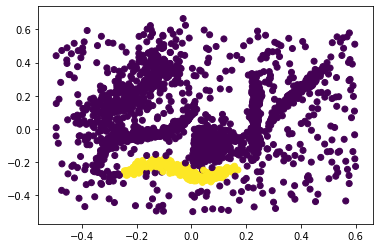

In [6]:
labels = np.zeros(len(X))
size = grow_cluster(100, X, 0.02, 5, labels, 1)
plt.scatter(X[:,0], X[:,1], c=labels)
print(f'Cluster size obtained: {size}, should be {8993}')
### BEGIN HIDDEN TESTS
assert size == 8993
### END HIDDEN TESTS

## Combining both function into the DBSCAN algorithm

We reproduce the same function provided in the notes for convinience. Refer to the notes for a discussion of the algorithm.

In [7]:
def dbscan(X, e, q):
    """ The DBSCAN algorithm. Unoptimized implementation with pedagogical purposes.
        
        INPUTS:
                -X: data matrix
                -e: epsilon, the neighbor radius arround each point
                -q: The minimum number of points for a cluster to be dense
    """
    
    n, d = X.shape
    # Array to hold cluster assignments: 0 is not considered, -1 is noise
    # You need to return this array correctly
    labels = np.zeros(n)
    
    # Current cluster label
    m = 0
    
    # Instead of using sets, well just iterate over every point in order.
    # If you want to choose at random, you can shuffle X before starting.
    # I don't beleive it makes a difference
    for i, x in enumerate(X):
        if labels[i] != 0:
            # Point already in another cluster
            continue
        nbrs = eps_neighborhood(i, X, e)
        if len(nbrs) < q:
            # Is a noise point (so far, can be claimed later.)
            labels[i] = -1
            continue
        # else, x is a core point
        m += 1
        m_size = grow_cluster(i, X, e, q, labels, m)
        
    return labels

Compare results with lecture notes.

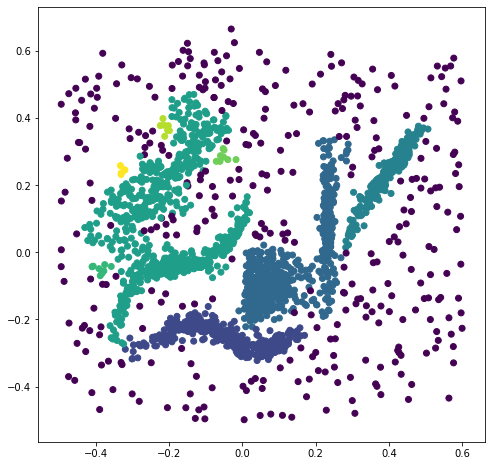

In [15]:
# Now test different values of e and q.
# A good choice seems to be e = 0.025 and q = 4.
labels = dbscan(X, 0.025, 4)
figure = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=labels);

## HDBSCAN (2 points)

Watch video, read documentation. Then try HDBSCAN with the same sample dataset. Compare.

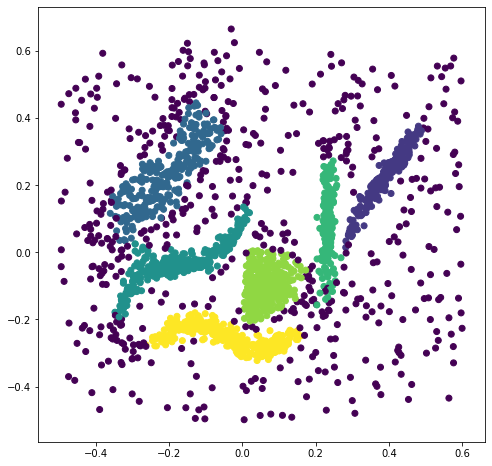

In [122]:
# Write your code here, add cells if needed.
import hdbscan

### BEGIN SOLUTION
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
clusterer.fit(X)
labels = clusterer.labels_
figure = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=labels);
### END SOLUTION